In [2]:
import numpy as np

np.random.rand()

0.5711513852214285

Von Neumann - Middle-square method

In [ ]:
# semente = 5 # momoento que o primeiro rand é rodado
# formula(x) = x * 3 / 2
# formula(5) = 7.5
# formula(7.5) = 11.25

In [ ]:
5*3/2

7.5

In [ ]:
7.5*3/2

11.25

In [ ]:
seed = 150
# 12345
# 90000*90000
# 8100000000

def middle_square():
  global seed
  result = seed * seed
  result = "{0:08d}".format(result)
  result = result[2:6]
  # print(result)
  result = int(result)
  seed = result
  return result

In [ ]:
print(middle_square())
print(middle_square())
print(middle_square())
print(middle_square())
print(middle_square())

225
506
2560
5536
6472


In [19]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


def test_random(pseudo_random_generator):
     results = np.array([pseudo_random_generator() for i in tqdm(range(10000000))])
    results = pd.DataFrame(np.array([results]).T, columns=["middle_square"])
    print(results.mean())
    results.plot(kind='hist')
    plt.show()
    display(results.value_counts().head())
    results.describe()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

100%|██████████| 10000000/10000000 [00:10<00:00, 953302.45it/s]


middle_square    5099.997823
dtype: float64


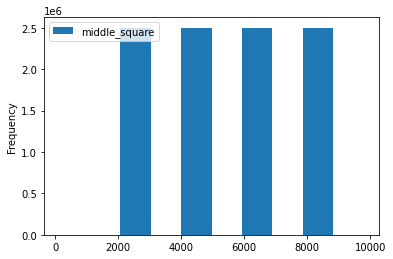

middle_square
4100             2499987
6100             2499987
8100             2499987
2100             2499986
3388                   1
dtype: int64

In [ ]:
seed = 150

test_random(middle_square)

In [4]:
# From https://en.wikipedia.org/wiki/Middle-square_method

seed_number = 150

number = seed_number
already_seen = set()
counter = 0

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(number * number).zfill(8)[2:6])  # zfill adds padding of zeroes
    print(f"#{counter}: {number}")

print(f"We began with {seed_number}, and"
      f" have repeated ourselves after {counter} steps"
      f" with {number}.")

#1: 225
#2: 506
#3: 2560
#4: 5536
#5: 6472
#6: 8867
#7: 6236
#8: 8876
#9: 7833
#10: 3558
#11: 6593
#12: 4676
#13: 8649
#14: 8052
#15: 8347
#16: 6724
#17: 2121
#18: 4986
#19: 8601
#20: 9772
#21: 4919
#22: 1965
#23: 8612
#24: 1665
#25: 7722
#26: 6292
#27: 5892
#28: 7156
#29: 2083
#30: 3388
#31: 4785
#32: 8962
#33: 3174
#34: 742
#35: 5505
#36: 3050
#37: 3025
#38: 1506
#39: 2680
#40: 1824
#41: 3269
#42: 6863
#43: 1007
#44: 140
#45: 196
#46: 384
#47: 1474
#48: 1726
#49: 9790
#50: 8441
#51: 2504
#52: 2700
#53: 2900
#54: 4100
#55: 8100
#56: 6100
#57: 2100
#58: 4100
We began with 150, and have repeated ourselves after 58 steps with 4100.


In [21]:
x = 0
weil_counter = 0
k = int("0xb5ad4eceda1ce2a9", 0)

def msws():
  global x, weil_counter, k
  result = x * x
  weil_counter += k
  result += weil_counter
  result = str(result).zfill(8)
  result = result[2:6]
  # print(result)
  result = int(result)
  x = result
  return result

In [6]:
k

13091206342165455529

100%|██████████| 10000000/10000000 [00:18<00:00, 542774.74it/s]


middle_square    4967.842999
dtype: float64


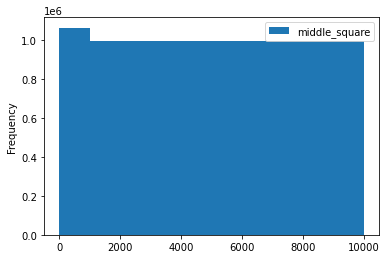

middle_square
776              1079
658              1078
632              1077
552              1077
493              1077
dtype: int64

In [22]:
test_random(msws)

Plotting random numbers Middle-Square Weil Counter

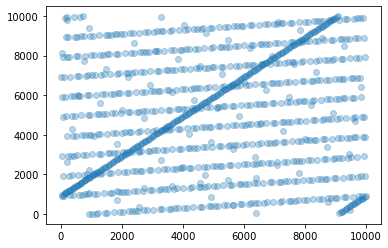

In [23]:
x=0
weil_counter=0
x_axis=np.array([msws() for i in range(1000)])
y_axis=np.array([msws() for i in range(1000)])

plt.scatter(x_axis,y_axis,alpha=0.3)
plt.show()


Plotting random numbers Random

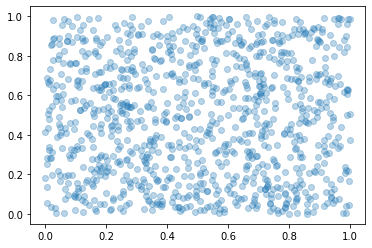

In [24]:
x_axis=np.random.random(1000)
y_axis=np.random.random(1000)

plt.scatter(x_axis,y_axis,alpha=0.3)
plt.show()


Suggested alteration MSWS

In [29]:
x = 0
weil_counter = 0
k = int("0xb5ad4eceda1ce2a9", 0)
def msws_adjusted():
    global x, weil_counter, k
    result = x * x
    weil_counter += k
    result += weil_counter
    result = str(result).zfill(8)
    #Using the second and sixth from right to left
    result = result[-6:-2]
    result = int(result)
    x = result
    return result

100%|██████████| 10000000/10000000 [00:15<00:00, 654749.71it/s]


middle_square    5002.164908
dtype: float64


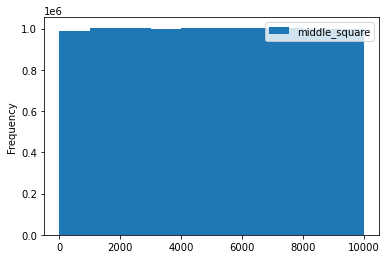

middle_square
4530             1682
2207             1406
6196             1361
4531             1360
7413             1350
dtype: int64

In [26]:
test_random(msws_adjusted)

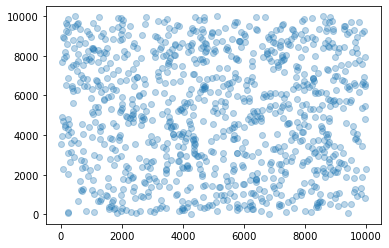

In [30]:
x=0
weil_counter=0
x_axis=np.array([msws_adjusted() for i in range(1000)])
y_axis=np.array([msws_adjusted() for i in range(1000)])

plt.scatter(x_axis,y_axis,alpha=0.3)
plt.show()